In [1]:
# Importing necessary libraries
import numpy as np        # For numerical operations
import pandas as pd       # For data manipulation and analysis
import matplotlib.pyplot as plt  # For data visualization
%matplotlib inline

# Importing WordCloud for text visualization
from wordcloud import WordCloud

# Importing spaCy for natural language processing
import spacy
import string

# Load spaCy English model
# You can use 'en_core_web_sm' for faster processing or 'en_core_web_md' for better accuracy
nlp = spacy.load('en_core_web_sm')

# Read the CSV file
df = pd.read_csv('spam.csv')

# Display the first few rows of the DataFrame
df.head()

# Drop unnecessary columns
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

# Rename the columns
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)

# Encode the target column
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

# Remove duplicate entries
print(f"Number of duplicates: {df.duplicated().sum()}")
df = df.drop_duplicates(keep='first')
print(f"Total records after removing duplicates: {len(df)}")

# Lowercase transformation and text preprocessing function using spaCy
def transform_text_spacy(text):
    # Transform the text to lowercase
    text = text.lower()
    
    # Process with spaCy
    doc = nlp(text)
    
    # Get tokens and filter out stopwords, punctuation, and non-alphanumeric tokens
    filtered_tokens = []
    for token in doc:
        # Check if token is not a stopword, not punctuation, and is alphanumeric
        if not token.is_stop and not token.is_punct and token.is_alpha:
            # Add lemmatized form (spaCy's equivalent to stemming)
            filtered_tokens.append(token.lemma_)
    
    # Join the processed tokens back into a single string
    return " ".join(filtered_tokens)

# Test the transform function with an example
example_text = 'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'
print(transform_text_spacy(example_text))

# Apply the transformation to the entire dataset
df['transformed_text'] = df['text'].apply(transform_text_spacy)
df.head()

# Feature extraction using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=500)

# Transform the preprocessed text data
X = tfidf.fit_transform(df['transformed_text']).toarray()
y = df['target'].values

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)



Number of duplicates: 403
Total records after removing duplicates: 5169
jurong point crazy available bugis n great world la e buffet cine get amore wat


In [2]:
# Import classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# Initialize classifiers
svc = SVC(kernel="sigmoid", gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)    
xgb = XGBClassifier(n_estimators=50, random_state=2)

# Create a dictionary of classifiers
clfs = {
    'SVC': svc,
    'KNN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'Adaboost': abc,
    'Bgc': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'xgb': xgb
}

# Define a function to train and evaluate classifiers
from sklearn.metrics import accuracy_score, precision_score
def train_classifier(clfs, X_train, y_train, X_test, y_test):
    clfs.fit(X_train, y_train)
    y_pred = clfs.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy, precision

# Train and evaluate all classifiers
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    print()
    print("For: ", name)
    print("Accuracy: ", current_accuracy)
    print("Precision: ", current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)




For:  SVC
Accuracy:  0.9680851063829787
Precision:  0.9487179487179487

For:  KNN
Accuracy:  0.9400386847195358
Precision:  0.9634146341463414

For:  NB
Accuracy:  0.9642166344294004
Precision:  0.9243697478991597

For:  DT
Accuracy:  0.9235976789168279
Precision:  0.8314606741573034

For:  LR
Accuracy:  0.965183752417795
Precision:  0.9322033898305084

For:  RF
Accuracy:  0.9690522243713733
Precision:  0.9344262295081968

For:  Adaboost
Accuracy:  0.9003868471953579
Precision:  0.9069767441860465

For:  Bgc
Accuracy:  0.9584139264990329
Precision:  0.8571428571428571

For:  ETC
Accuracy:  0.9690522243713733
Precision:  0.9206349206349206

For:  GBDT
Accuracy:  0.9487427466150871
Precision:  0.967032967032967

For:  xgb
Accuracy:  0.9700193423597679
Precision:  0.9495798319327731


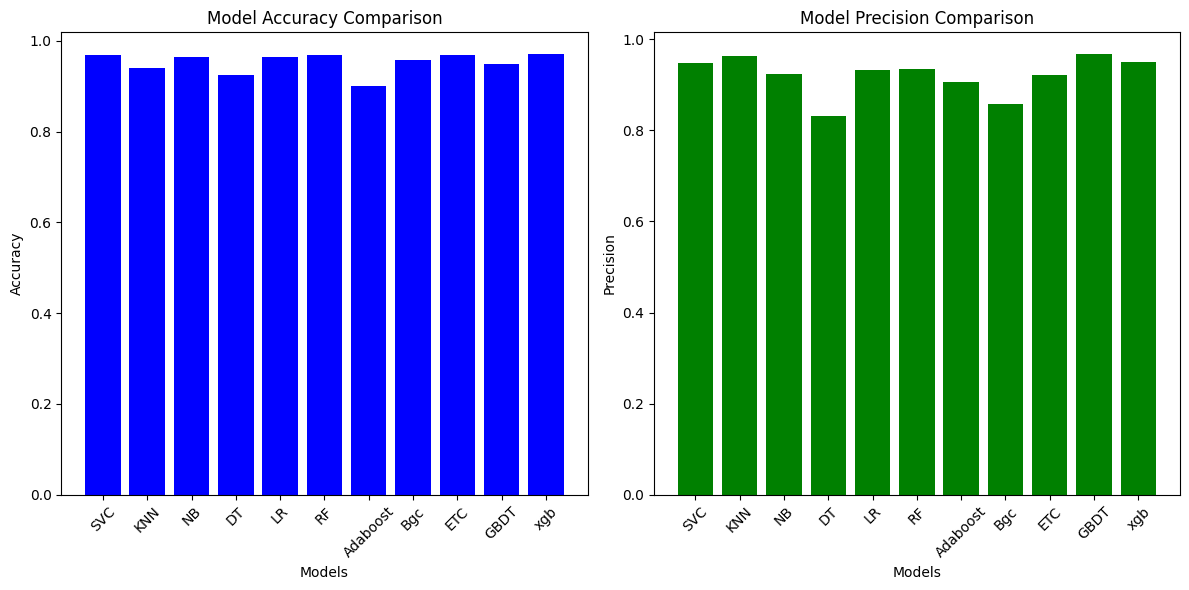

In [3]:
# Plotting model performance for comparison
plt.figure(figsize=(12, 6))
models = list(clfs.keys())

plt.subplot(1, 2, 1)
plt.bar(models, accuracy_scores, color='blue')
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.bar(models, precision_scores, color='green')
plt.title('Model Precision Comparison')
plt.xlabel('Models')
plt.ylabel('Precision')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()